In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
#reading dataset 
df= pd.read_csv('ML_A2_part3.csv')

#encoding labels
for i in range(df.shape[0]):
    if df.iloc[i,-1] =='jasmine':
        df.iloc[i,-1]=0
    else:
        df.iloc[i,-1]=1
df.iloc[:,-1]= df.iloc[:,-1].astype('int')

#sampling
df = df.sample(frac = 1)

#dropping id column
df = df.drop(['id'], axis = 1)

In [3]:
#scaling the data by min max normalisation
for column in df.columns:
    if column!='Class':
        maxx = df[column].max()
        minn = df[column].min()
        for e in df[column]:
            e1 = (maxx - e)/(maxx - minn)
            df[column] = df[column].replace(e, e1)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
4032,0.501301,0.600052,0.239200,0.583212,0.527465,1.954015,0.504153,0.642271,0.089323,0.882674,1
2319,0.646592,0.420645,0.679326,0.120557,0.670305,1.954015,0.799068,0.623437,0.326437,0.453016,0
3395,0.479318,0.266386,0.583192,0.107865,0.515245,1.954023,0.781096,0.502000,0.333500,0.423713,0
11337,0.458767,0.441313,0.378038,0.301783,0.492822,1.954023,0.515860,1.630629,0.175899,0.709887,1
1418,0.766909,0.560169,0.766232,0.135555,0.780401,0.695789,0.413783,1.630108,0.280947,0.484684,0


In [41]:
LDA_acc=[]
Perceptron_acc=[]
NB=[]
LR=[]
ANN=[]
SVM_acc=[]


In [42]:
#Function that returns training and testing accuracies
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_train_pred= model.predict(X_train)
    return accuracy_score(y_test, y_pred), accuracy_score(y_train, y_train_pred)

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=7)

for train_index, test_index in kf.split(df):
    X_train, X_test= df.iloc[train_index,:-1] ,df.iloc[test_index,:-1]
    Y_train, Y_test = df.iloc[train_index,-1] , df.iloc[test_index,-1]
    LDA_acc.append(get_score(LDA(tol=0.0001),X_train, X_test, Y_train,Y_test ))  #Fisher's Linera Discriminant
    SVM_acc.append(get_score(SVC(kernel='rbf',random_state=0), X_train, X_test, Y_train,Y_test )) #Support vector machine
    Perceptron_acc.append(get_score(Perceptron(random_state=0), X_train, X_test, Y_train,Y_test )) #Perceptron
    NB.append(get_score(GaussianNB(), X_train, X_test, Y_train,Y_test )) #Naive Bayes Classifier
    LR.append(get_score(LogisticRegression(random_state=0), X_train, X_test, Y_train,Y_test )) #logistic regression
    ANN.append(get_score(MLPClassifier(max_iter = 1000, activation = 'logistic', solver = 'adam', 
                        random_state = 0), X_train, X_test,Y_train,Y_test )) #Artificial Neural Network

In [44]:
# data = df.to_numpy()
# data_split = np.array_split(data,7)

# #7-fold validation
# for i in range(7):
#     x_test = []
#     y_test = []
#     x_train = []
#     y_train = []
#     for j in range(7):
#         # training dataset
#         if j!=i:      
#             for w in range(len(data_split[j])):
#                 x_train.append(data_split[j][w][:10])
#                 y_train.append(data_split[j][w][10])
#         #testing dataset
#         elif j == i: 
#             for w in range(len(data_split[j])):
#                 x_test.append(data_split[j][w][:10])
#                 y_test.append(data_split[j][w][10])
                

#     X_test = np.array(x_test)
#     X_train = np.array(x_train)
#     Y_test= np.array(y_test)
#     Y_train = np.array(y_train)
#     print(i)
#     #applying models
#     LDA_acc.append(get_score(LDA(tol=0.001),X_train, X_test, Y_train,Y_test ))  #Fisher's Linera Discriminant
#     SVM_acc.append(get_score(SVC(kernel='rbf',random_state=1), X_train, X_test, Y_train,Y_test )) #Support vector machine with radial basis kernel
#     Perceptron_acc.append(get_score(Perceptron(tol=0.001,random_state=1), X_train, X_test, Y_train,Y_test )) #Perceptron
#     NB.append(get_score(GaussianNB(), X_train, X_test, Y_train,Y_test )) #Naive Bayes Classifier
#     LR.append(get_score(LogisticRegression(tol=0.001,random_state = 1), X_train, X_test, Y_train,Y_test )) #logistic regression
#     ANN.append(get_score(MLPClassifier(hidden_layer_sizes = (10,10,10,10), max_iter = 1000, activation = 'logistic', solver = 'adam', 
#                         random_state = 1), X_train, X_test,Y_train,Y_test )) #Artificial Neural Network

In [45]:
#Appending Training and testing accuracies
data= [LDA_acc,Perceptron_acc,NB,LR,ANN,SVM_acc]
Model_train=[]
Model_test=[]
Training_acc=[]
Testing_acc=[]
for j in range(len(data)):
    for (a,b) in data[j]:
        Model_test.append(a)
        Model_train.append(b)
    Training_acc.append(Model_train)
    Testing_acc.append(Model_test)
    Model_train=[]
    Model_test=[]


In [46]:
#average training and testing accuracies
Models=['LDA','Perceptron','Naive Bayes','Logistic Regression','ANN','SVM']
for i in range(6):
    print('Average Training accuracy of:'+str(Models[i]) +':'+ str(np.mean(Training_acc[i])))
    print('Average Testing accuracy of:'+str(Models[i]) +':'+ str(np.mean(Testing_acc[i])))

Average Training accuracy of:LDA:0.9840986143876157
Average Testing accuracy of:LDA:0.9840527360262781
Average Training accuracy of:Perceptron:0.9841627610076876
Average Testing accuracy of:Perceptron:0.9844376898434655
Average Training accuracy of:Naive Bayes:0.9846393474643153
Average Testing accuracy of:Naive Bayes:0.9843827660107947
Average Training accuracy of:Logistic Regression:0.9871872365145242
Average Testing accuracy of:Logistic Regression:0.9870220954301805
Average Training accuracy of:ANN:0.987343042833858
Average Testing accuracy of:ANN:0.9871320913094107
Average Training accuracy of:SVM:0.9886811425044787
Average Testing accuracy of:SVM:0.9883968004263138


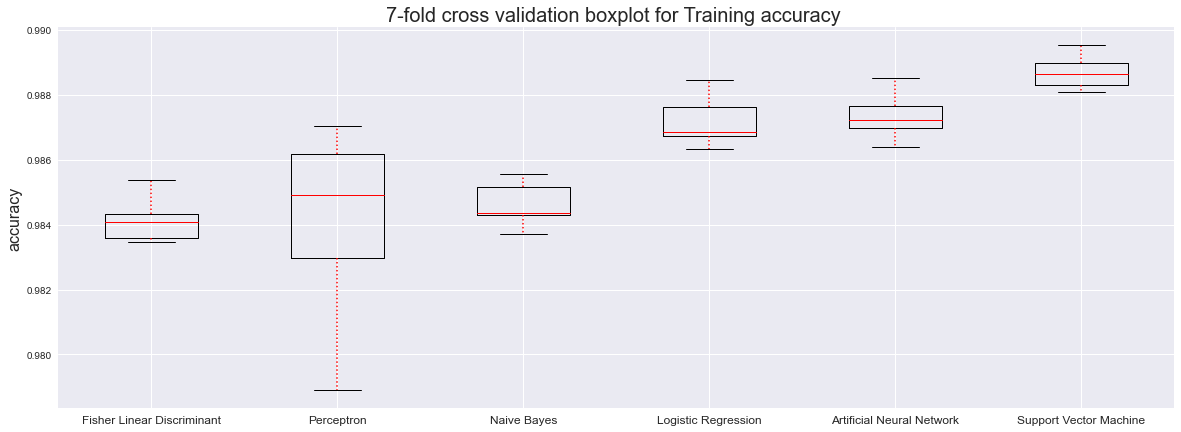

In [49]:
import statistics
plt.style.use('seaborn')
fig = plt.figure(figsize =(20,10))
ax = fig.add_subplot(111)
#ax.set(facecolor = "orange")


bp = ax.boxplot(Training_acc, patch_artist = False ,meanline=True,medianprops=dict(color='red'))


for whisker in bp['whiskers']:
    whisker.set(color ='red',
                linewidth = 1.5,
                linestyle =":")
    
ax.set_xticklabels(['Fisher Linear Discriminant','Perceptron','Naive Bayes','Logistic Regression','Artificial Neural Network','Support Vector Machine'],fontsize=12)
ax.set_ylabel('accuracy',fontsize=16)
plt.title("7-fold cross validation boxplot for Training accuracy ",fontsize=20)
plt.show(bp)
# 

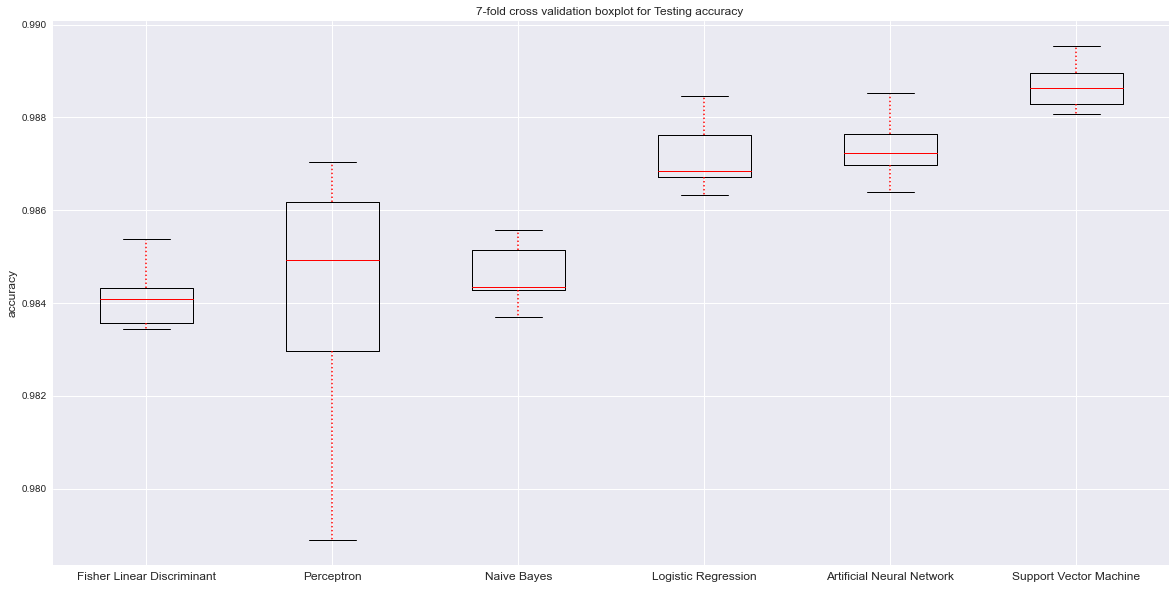

In [48]:
#plt.style.use('seaborn')
fig = plt.figure(figsize =(20, 10))
ax = fig.add_subplot(111)
#ax.set(facecolor = "orange")


bp = ax.boxplot(Training_acc, patch_artist = False,medianprops=dict(color='red'))

for whisker in bp['whiskers']:
    whisker.set(color ='red',
                linewidth = 1.5,
                linestyle =":")

ax.set_xticklabels(['Fisher Linear Discriminant','Perceptron','Naive Bayes','Logistic Regression','Artificial Neural Network','Support Vector Machine'],fontsize=12)
ax.set_ylabel('accuracy',fontsize=12)
#plt.ylim(0.89, 1.00)
plt.title("7-fold cross validation boxplot for Testing accuracy ",fontsize=20)
plt.show(bp)
# 